Name -- Data Type -- Measurement

Cement (component 1) -- quantitative -- kg in a m3 mixture
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture

Fly Ash (component 3) -- quantitative  -- kg in a m3 mixture

Water  (component 4) -- quantitative  -- kg in a m3 mixture

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture

Coarse Aggregate  (component 6) -- quantitative -- kg in a m3 mixture

Fine Aggregate (component 7)	 -- quantitative  -- kg in a m3 mixture

Age -- quantitative  -- Day (1~365)
Concrete compressive strength -- quantitative -- MPa

https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter


In [3]:
def Evaluation_Metrics (model, X_train, y_train, X_test, y_test, y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    r2 = model.score(X_test, y_test)

    n = X_test.shape[0]
    p = X_test.shape[1]

    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Технологии МО/Concrete_Data.xls')
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


# Линейная регрессия

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

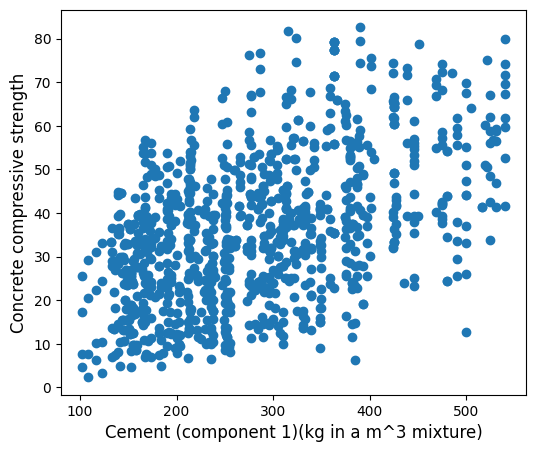

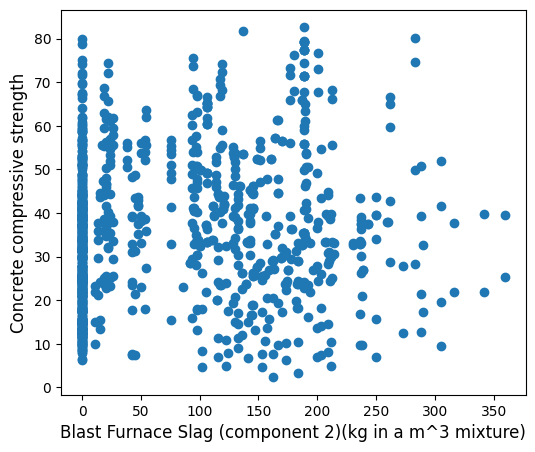

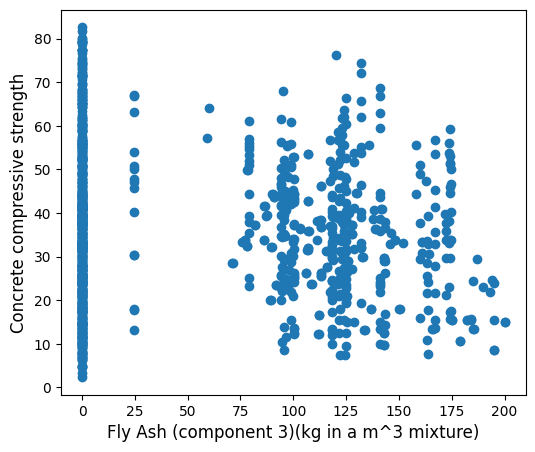

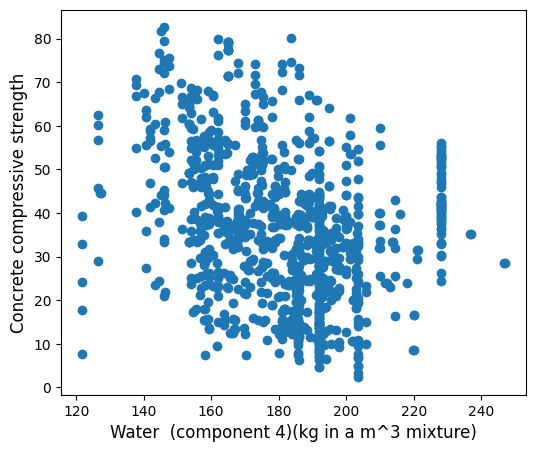

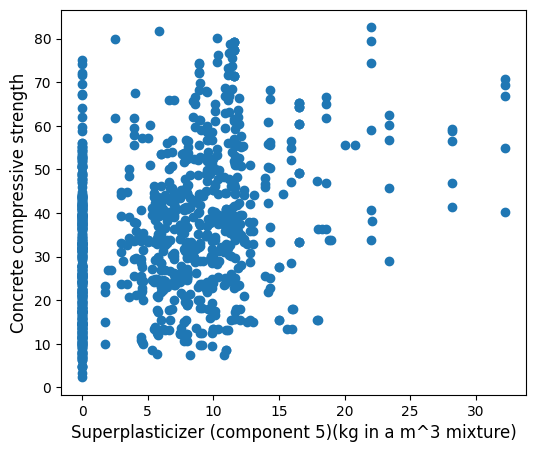

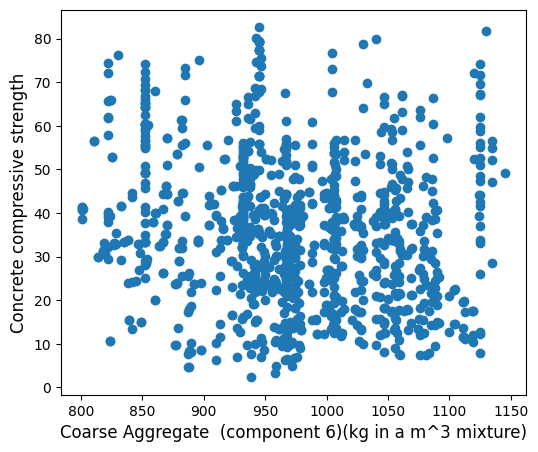

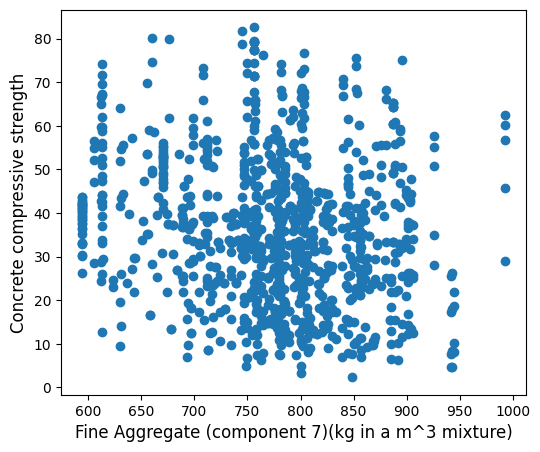

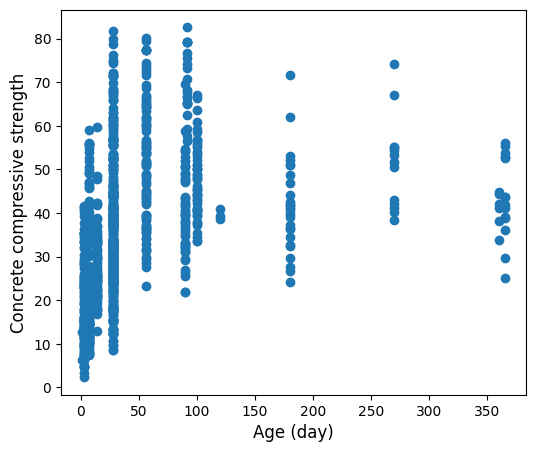

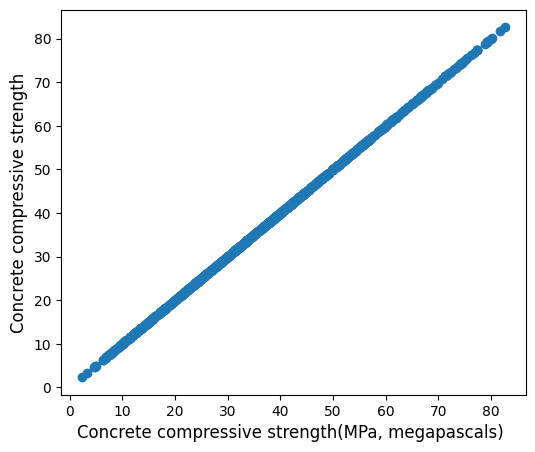

In [13]:
for index, feature_name in enumerate(df.columns):
    plt.figure(figsize=(6, 5))
    plt.scatter(df.values[:, index], df['Concrete compressive strength(MPa, megapascals) '])
    plt.ylabel('Concrete compressive strength', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [7]:
X = df.drop(['Concrete compressive strength(MPa, megapascals) '], axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [8]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)

Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  10.6859
  R2: 0.5569
 Adjusted R2: 0.5389
 Cross Validated R2: 0.6069


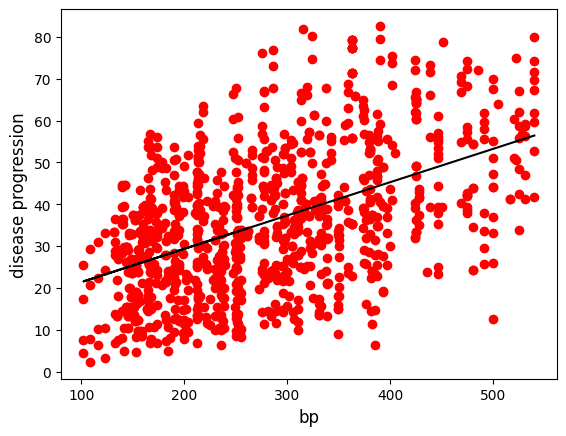

In [9]:
X_LR = df['Cement (component 1)(kg in a m^3 mixture)'].values[:,np.newaxis]
# target data is array of shape (n,)
y_LR = df['Concrete compressive strength(MPa, megapascals) '].values

model_LR = LinearRegression()
model_LR.fit(X_LR, y_LR)

plt.scatter(X_LR, y_LR,color='r')
plt.plot(X_LR, model_LR.predict(X_LR),color='k')
plt.ylabel('Concrete compressive strength', size=12)
plt.xlabel('bp', size=12)

plt.show()

# Полиномиальная регрессия


In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)

X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [17]:
modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)
y_pr_PR = modelPR.predict(X_p_test)

Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  6.0902
  R2: 0.8629
 Adjusted R2: 0.7068
 Cross Validated R2: 0.7741


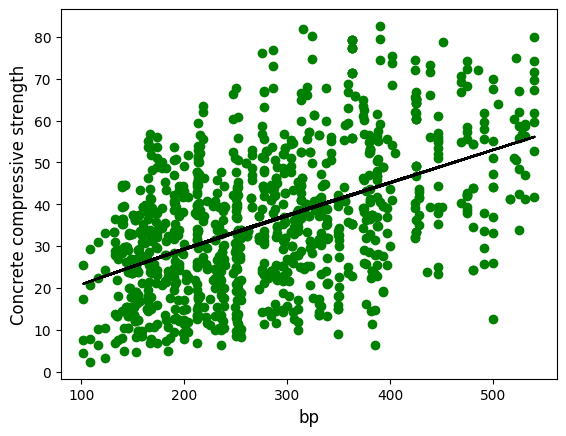

In [18]:
X_poly = df['Cement (component 1)(kg in a m^3 mixture)'].values[:,np.newaxis]
y_poly = df['Concrete compressive strength(MPa, megapascals) '].values

poly_features = poly.fit_transform(X_poly)
model2 = LinearRegression()
model2.fit(poly_features, y_poly)

plt.scatter(X_poly, y_poly,color='g')
plt.plot(X_poly, model2.predict(poly.fit_transform(X_poly)),color='k')
plt.ylabel('Concrete compressive strength', size=12)
plt.xlabel('bp', size=12)
plt.show()

# Регрессия дерева принятия решений

In [19]:
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)

Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  6.2397
  R2: 0.8489
 Adjusted R2: 0.8428
 Cross Validated R2: 0.8118


# Регрессия случайного леса

In [20]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)


Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  4.0748
  R2: 0.9356
 Adjusted R2: 0.933
 Cross Validated R2: 0.8971


# Регрессия опорных векторов (SVR)

Линейное ядро

In [21]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='linear')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)


Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  11.724
  R2: 0.4667
 Adjusted R2: 0.445
 Cross Validated R2: 0.5685


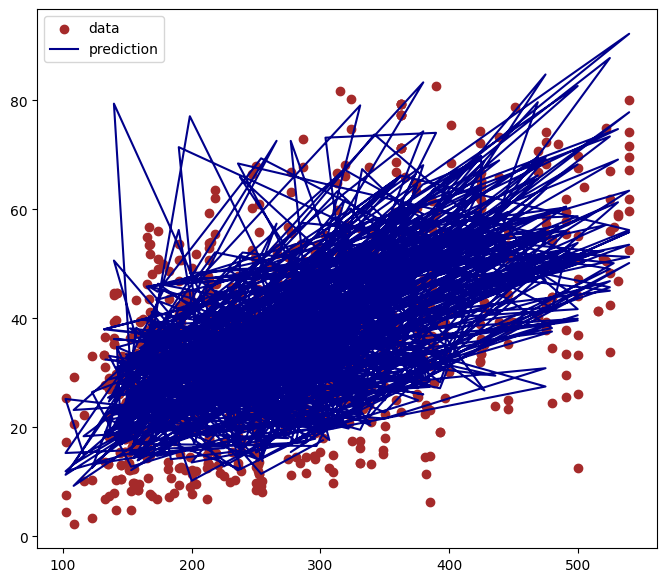

In [31]:
plt.figure(figsize=(8, 7))
plt.scatter(X_train["Cement (component 1)(kg in a m^3 mixture)"], y_train, color='brown',
            label='data')
plt.plot(X_train["Cement (component 1)(kg in a m^3 mixture)"], modelSVR.predict(X_train), color='darkblue',
         label='prediction')
plt.legend()
plt.show()

Полиномиальное ядро


In [39]:
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)


Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  11.6714
  R2: 0.4714
 Adjusted R2: 0.45
 Cross Validated R2: 0.4773


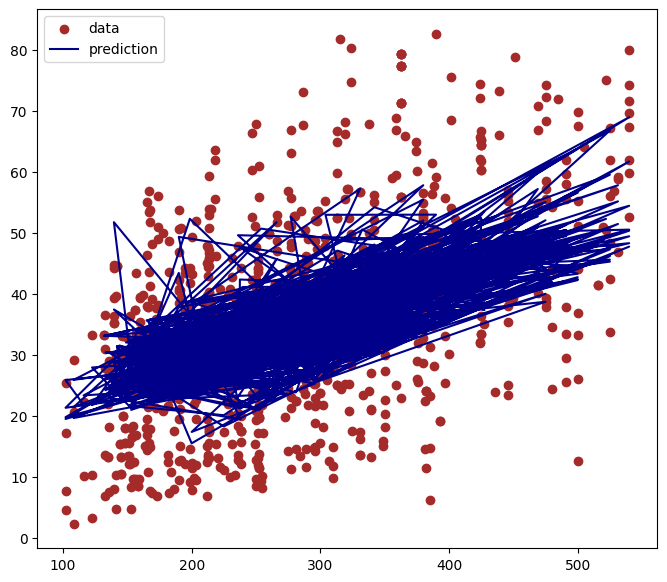

In [40]:
plt.figure(figsize=(8, 7))
plt.scatter(X_train["Cement (component 1)(kg in a m^3 mixture)"], y_train, color='brown',
            label='data')
plt.plot(X_train["Cement (component 1)(kg in a m^3 mixture)"], modelSVR.predict(X_train), color='darkblue',
         label='prediction')
plt.legend()
plt.show()

Ядро - радиальная базисная функция

In [41]:
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)


Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  14.0758
  R2: 0.2312
 Adjusted R2: 0.2
 Cross Validated R2: 0.2229


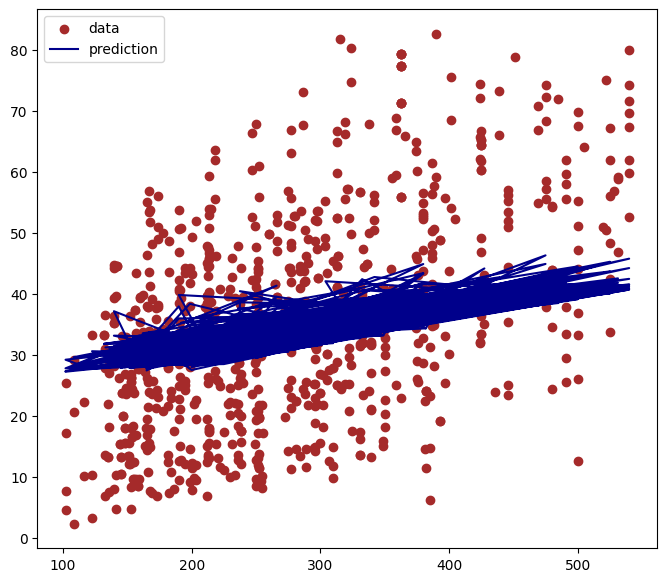

In [42]:
plt.figure(figsize=(8, 7))
plt.scatter(X_train["Cement (component 1)(kg in a m^3 mixture)"], y_train, color='brown',
            label='data')
plt.plot(X_train["Cement (component 1)(kg in a m^3 mixture)"], modelSVR.predict(X_train), color='darkblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [36]:
from sklearn.linear_model import ElasticNet


modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

modelEN.fit(X_train, y_train)

y_en_pred = modelEN.predict(X_test)

Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  10.6865
  R2: 0.5569
 Adjusted R2: 0.5389
 Cross Validated R2: 0.6069


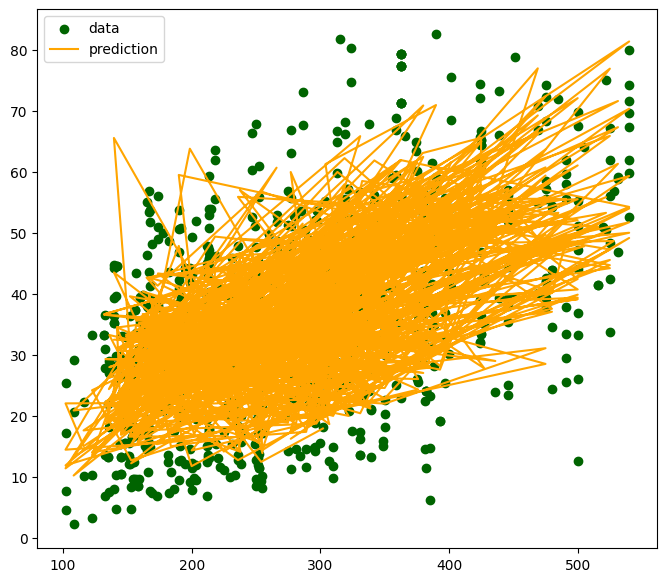

In [44]:
plt.figure(figsize=(8, 7))
plt.scatter(X_train["Cement (component 1)(kg in a m^3 mixture)"], y_train, color='darkgreen',
            label='data')
plt.plot(X_train["Cement (component 1)(kg in a m^3 mixture)"], modelEN.predict(X_train), color='orange',
         label='prediction')
plt.legend()
plt.show()